 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>

This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<b> Part - (1) : Develop a neural network based classification network from scratch: </b> This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>


In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 784)
Training labels (60000, 10)
Testing data (10000, 784)
Testing labels (10000, 10)
Epoch:  0 Training Accuracy: 14.2222 Validation Accuracy: 15.0000 Training Error: 23.6032 Validation Error: 23.4165
Epoch:  10 Training Accuracy: 49.8889 Validation Accuracy: 40.0000 Training Error: 13.8294 Validation Error: 16.5786
Epoch:  20 Training Accuracy: 65.1111 Validation Accuracy: 55.0000 Training Error: 9.5786 Validation Error: 12.4340
Epoch:  30 Training Accuracy: 71.7778 Validation Accuracy: 59.0000 Training Error: 7.7146 Validation Error: 11.3287
Epoch:  40 Training Accuracy: 74.6667 Validation Accuracy: 60.0000 Training Error: 6.9122 Validation Error: 10.8933
Epoch:  50 Training Accuracy: 81.8889 Validation Accuracy: 61.0000 Training Error: 4.8380 Validation Error: 10.7761
Epoch:  60 Training Accuracy: 83.8889 Validation Accuracy: 62.0000 Training Error: 4.3266 Validation Error: 10.0512
Epoch:  70 Training Accuracy: 86.5556 Validation Accuracy: 60.0000 Training Err

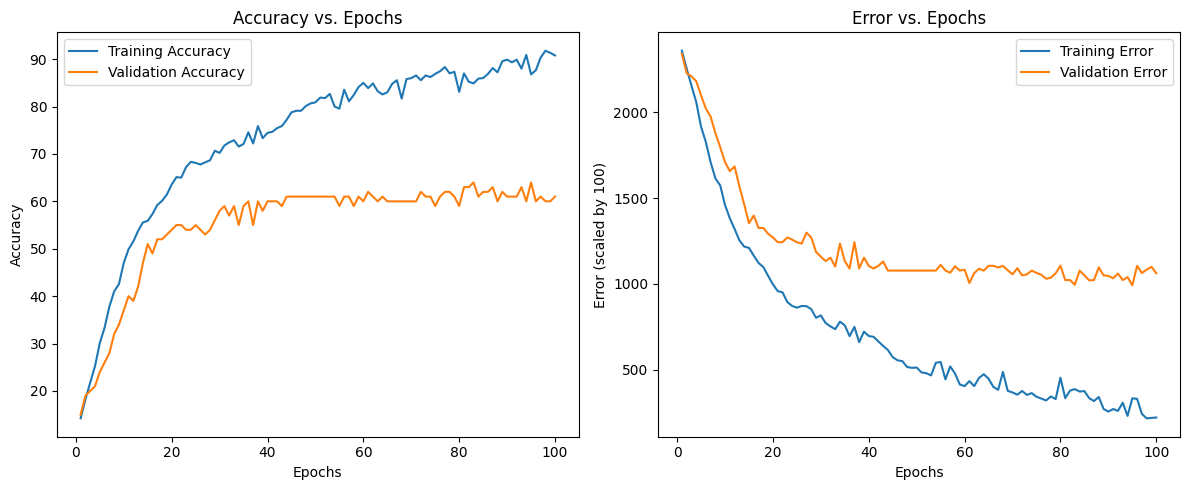

In [27]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

#Reshape the data
mnist_traindata = mnist_traindata.reshape((60000,28*28))
mnist_testdata = mnist_testdata.reshape((10000,28*28))

# 1 of k encoding for labels (0-9)  
mnist_trainlabel_1ofk = np.zeros((60000,10))
for i in range(60000):
    mnist_trainlabel_1ofk[i][mnist_trainlabel[i]] = 1

mnist_testlabel_1ofk = np.zeros((10000,10))
for i in range(10000):
    mnist_testlabel_1ofk[i][mnist_testlabel[i]] = 1

print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel_1ofk.shape)

print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel_1ofk.shape)

mnist_traindata = mnist_traindata/255
mnist_testdata = mnist_testdata/255

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  return np.maximum(0, inp)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  return np.where(inp > 0, 1, 0)

#Complete the below function to impliment softmax activation function
def softmax(inp):
  exp_vals = np.exp(inp - np.max(inp, axis=1, keepdims=True))
  return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases  # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)
  
  # inputs shape: [batch_size, 784]

  #Structure 
  #Input Layer ----(W1)----> Hidden Layer1 ----(W2)----> Hidden Layer2 ----(W3)----> Output Layer
  #   784                       512                         512                          10

  #Forward propogation
  z1 = ReLu(np.dot(inputs, W1.T) + b1.T)  # Shape: [batch_size, 512]
  z2 = ReLu(np.dot(z1, W2.T) + b2.T)      # Shape: [batch_size, 512]
  y = softmax(np.dot(z2, W3.T) + b3.T)    # Shape: [batch_size, 10]

  #Return the requires outputs, i.e., final output and intermediate activations
  return [z1, z2, y]


#Complete the below function to compute the gradients
def computeGradients(X, t, weights, biases, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights  # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases   # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)
  z1, z2, y = activations # z1 shape: [batch_size, 512], z2 shape: [batch_size, 512], y shape: [batch_size, 10]

  #Compute the loss

  #Compote the derivative of loss at parameters
  # Output layer gradients
  delta_3 = y - t  # Shape: [batch_size, 10]
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]  # Shape: [10, 512]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]  # Shape: [10, 1]

  # Hidden layer 2 gradients
  delta_2 = np.dot(delta_3, W3) * gradReLu(z2)  # Shape: [batch_size, 512]
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]   # Shape: [512, 512]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  # Hidden layer 1 gradients
  delta_1 = np.dot(delta_2, W2) * gradReLu(z1)  # Shape: [batch_size, 512]
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]    # Shape: [512, 784]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, biases, gradients, bias_grad, learning_rate):
  #Inputs: weights, gradients, and learning rate
  # Update parameters for batch
  for i in range(len(weights)):
      weights[i] -= learning_rate * gradients[i]
      biases[i] -= learning_rate * bias_grad[i]

  return weights, biases

#Complete the below function to complete the backpropagation ste
def backPropagate(X, t, weights, biases, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients, bias_grad = computeGradients(X, t, weights, biases, activations)
  
  #Update the paramters using gradients
  weights, biases = applyGradients(weights, biases, gradients, bias_grad, learning_rate)

  #Return the updated parameters
  return weights, biases

def computeCrossEntropyLoss(y_pred, y_true):

    # Parameters:
    # - y_pred: numpy array of shape [batch_size, n_classes], predicted probabilities for each class.
    # - y_true: numpy array of shape [batch_size, n_classes], one-hot encoded true labels.

    # Returns:
    # - loss: scalar, the average cross-entropy loss over the batch.
    
    # Ensure numerical stability with a small epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    
    # Compute cross-entropy loss for each example in the batch
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512 

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features) 
  W2 = np.random.randn(hidden_units, hidden_units) 
  W3 = np.random.randn(n_classes, hidden_units) 

  b1 = np.zeros((hidden_units, 1))
  b2 = np.zeros((hidden_units, 1))
  b3 = np.zeros((n_classes, 1))

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases)

      #Backward propagation
      weights, biases = backPropagate(X, t, weights,biases, activations, learning_rate)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases)[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction 
    train_err = computeCrossEntropyLoss(train_pred, train_targets)

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases)[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)
  
  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()
  
  return weights, biases


#Call the training function to train the network
batch_size = 64
epochs = 100
train_val_split = 0.9
learning_rate = 0.000095

weights, biases = training(mnist_traindata[:1000], mnist_trainlabel_1ofk[:1000],True,batch_size,epochs,train_val_split,learning_rate)


In [6]:
##################################################
#Evaluate the performance on test data
##################################################

test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk

#Compute outpus on trianing data
test_pred = fwdPropagate(test_inputs, weights, biases)[-1]

#Compute testing accuracy, and testing error
test_accuracy = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction 
test_err = computeCrossEntropyLoss(test_pred, test_targets)

print("Test Accuracy: {:.4f}".format(test_accuracy*100), "Test Error: {:.4f}".format(test_err))

Test Accuracy: 80.6600 Test Error: 0.7867


<b> Report your observations </b>

1.

2.

3.


<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>


In [ ]:
##################################################
#Train the network with different activation functions
##################################################







##################################################
#Evaluate the performance on MNIST test data
##################################################










<b> Report your observations </b>

1.

2.

3.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>


In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################






##################################################
#Compare the accuracies and report your observations
##################################################








<b> Report your observations </b>

1.

2.

3.


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.

<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################








##################################################
#Training with dropout strategy
##################################################







##################################################
#Training with early stopping criterion
##################################################









<b> Report your observations </b>

1.

2.

3.


<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>


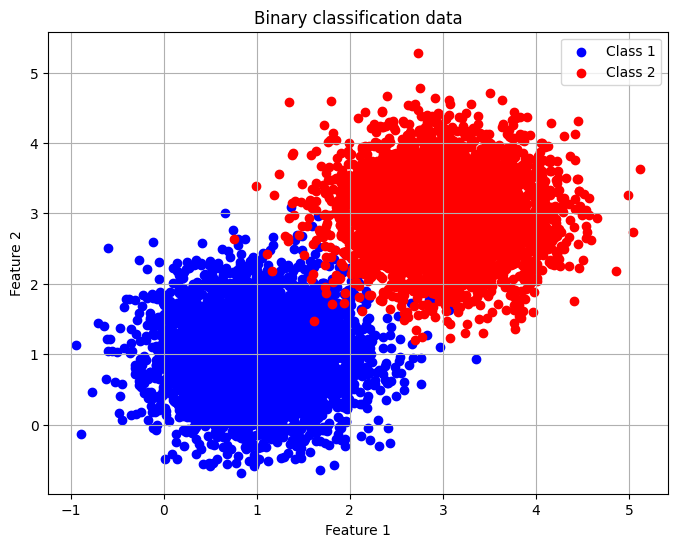

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


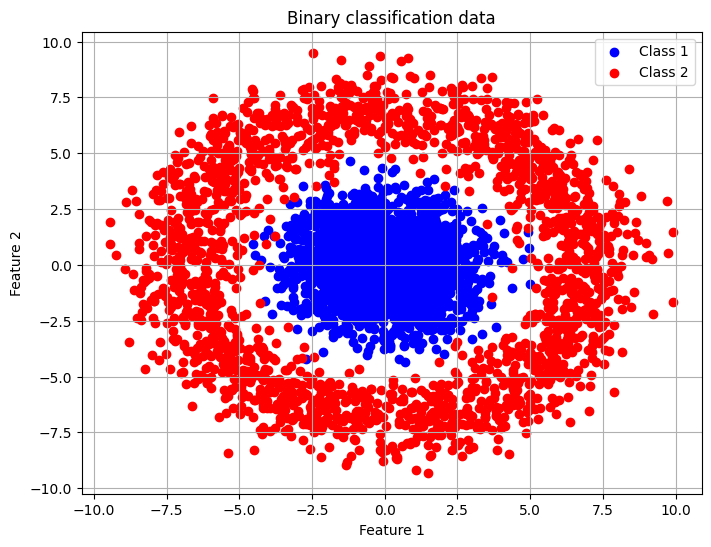

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################








##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on linearly separable data
##################################################










In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################








##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.

2.

3.
